# Computer Vision in C++

 - A célula deve ser executado para criação do arquivo .cpp (%%writefile teste.cpp).
 - Substituia o link na linha "std::string imageUrl", por uma imagem de teste do seu agrado.
 - Crie o arquivo ao executar a célula com "ctrl + ENTER"

In [ ]:
%%writefile teste.cpp

#include <iostream>
#include <string>
#include <sstream>
#include <curl/curl.h>
#include <opencv2/imgproc.hpp>
#include <opencv2/opencv.hpp> // Adicione esta linha

using namespace cv;

size_t WriteCallback(void *contents, size_t size, size_t nmemb, void *userp) {
    ((std::string*)userp)->append((char*)contents, size * nmemb);
    return size * nmemb;
}

std::vector<uchar> downloadImage(const std::string& url) {
    CURL *curl;
    CURLcode res;
    std::string readBuffer;

    curl = curl_easy_init();
    if(curl) {
        curl_easy_setopt(curl, CURLOPT_URL, url.c_str());
        curl_easy_setopt(curl, CURLOPT_WRITEFUNCTION, WriteCallback);
        curl_easy_setopt(curl, CURLOPT_WRITEDATA, &readBuffer);
        res = curl_easy_perform(curl);
        curl_easy_cleanup(curl);
        if(res != CURLE_OK) {
            std::cerr << "curl_easy_perform() falhou: " << curl_easy_strerror(res) << std::endl;
            return {};
        }
    } else {
        std::cerr << "curl_easy_init() falhou" << std::endl;
        return {};
    }

    std::vector<uchar> imageData(readBuffer.begin(), readBuffer.end());
    return imageData;
}

int main() {
    std::string imageUrl = "https://raw.githubusercontent.com/pgerc-unilab/Computer-Vision-in-C-/refs/heads/main/circle/colors.png";

    std::vector<uchar> imageData = downloadImage(imageUrl);

    if (imageData.empty()) {
        std::cerr << "Falha ao baixar a imagem." << std::endl;
        return -1;
    }

    Mat color = imdecode(imageData, IMREAD_COLOR);

    if (color.empty()) {
        std::cerr << "Falha ao decodificar a imagem." << std::endl;
        return -1;
    }

    Mat gray;
    cvtColor(color, gray, COLOR_BGR2GRAY);

    imwrite("imagem_baixada.jpg", color); // Salva a imagem colorida
    imwrite("imagem_baixada_cinza.jpg", gray); // Salva a imagem em tons de cinza

    return 0;
}

Writing teste.cpp


## Saida:
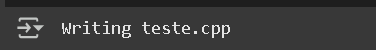

# Testando o projeto

- As linhas de comando retratam a utilização da ferramenta g++ para criação do arquivo executavel.
- As linhas subsequentes são para criação de um terminal que imprima o resultado no Colab.

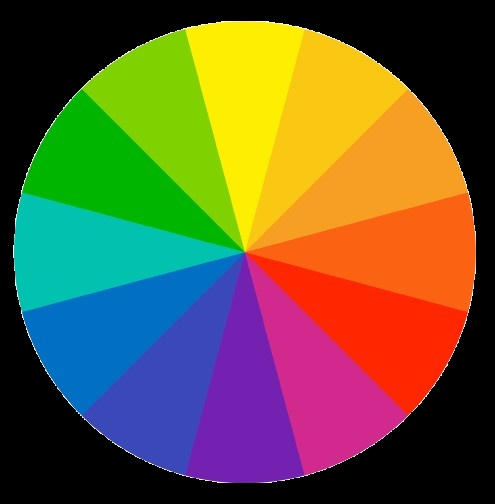

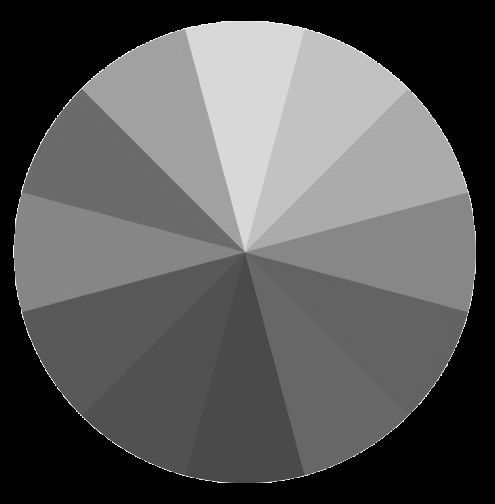

In [ ]:
!g++ teste.cpp -o teste `pkg-config --cflags --libs opencv4` -lcurl

!./teste

from google.colab.patches import cv2_imshow
import cv2

img_color = cv2.imread('imagem_baixada.jpg')
img_gray = cv2.imread('imagem_baixada_cinza.jpg')

cv2_imshow(img_color)
cv2_imshow(img_gray)